In [2]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

In [97]:
housevalue=fch()
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [98]:
x = pd.DataFrame(housevalue.data)

In [99]:
y = pd.DataFrame(housevalue.target)

In [100]:
x.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [101]:
y.head()

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [102]:
x.columns=housevalue.feature_names
y.columns=housevalue.target_names

In [103]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [104]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


#### 分训练集和数据集

In [105]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=420)

In [106]:
for i in [xtrain,xtest]:
    i.index = range(i.shape[0])

In [107]:
xtrain.shape

(14448, 8)

In [108]:
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [109]:
xtrain

array([[ 0.15962565,  0.51019125, -0.40038616, ...,  0.02097226,
         0.86530441, -1.30925728],
       [ 0.7616735 ,  0.74878657,  0.33049412, ..., -0.03103851,
         0.88874515, -1.36422214],
       [-1.01128797, -0.20559469,  0.1327176 , ..., -0.0140286 ,
         0.180835  ,  0.24474943],
       ...,
       [-1.11293105, -0.28512647, -0.60376949, ...,  0.08720641,
        -1.37094154,  1.23411704],
       [-0.16165875,  0.35112771, -0.00439378, ..., -0.02140349,
         1.21222727, -1.45916146],
       [ 0.6221305 ,  0.51019125, -0.06466591, ..., -0.00489167,
        -0.84586911,  0.80938852]])

#### 建模

In [110]:
reg = LR().fit(xtrain,ytrain)

In [111]:
yhat = reg.predict(xtest)

In [112]:
yhat

array([[1.49200483],
       [0.45491057],
       [2.25316267],
       ...,
       [2.11134142],
       [1.76705255],
       [0.72734973]])

In [113]:
yhat.min()

-0.6063367198384308

In [114]:
yhat.max()

7.210009063455006

#### 探索模型

In [115]:
y.max()

MedHouseVal    5.00001
dtype: float64

In [116]:
reg.coef_ #w，系数向量

array([[ 8.34330242e-01,  1.28392315e-01, -2.71751685e-01,
         3.07236193e-01,  5.87759764e-04, -4.09677688e-02,
        -8.81149778e-01, -8.52966760e-01]])

In [117]:
reg.intercept_ #截距w0

array([2.06282769])

In [118]:
#整合到一起观
names = pd.DataFrame(housevalue.feature_names)
value = pd.DataFrame(reg.coef_)

In [119]:
show_names_value = pd.concat([names,value.T],axis=1)
show_names_value

,0,0
0,MedInc,0.834330
1,HouseAge,0.128392
2,AveRooms,-0.271752
3,AveBedrms,0.307236
4,Population,0.000588
5,AveOccup,-0.040968
6,Latitude,-0.881150
7,Longitude,-0.852967


#### 画图看一下ytest和yhat的拟合效果


In [122]:
yhat.shape

(6192, 1)

In [131]:
ytest.shape

(6192, 1)

In [128]:
range(len(yhat))

range(0, 6192)

In [136]:
ytest

,MedHouseVal
5156,0.967
19714,0.616
18471,2.298
16156,3.563
7028,1.666
...,...
1412,2.321
14211,1.258
6848,2.457
20575,1.875


In [137]:
ytest.values

array([[0.967],
       [0.616],
       [2.298],
       ...,
       [2.457],
       [1.875],
       [0.683]])

In [140]:
yhat

array([[1.49200483],
       [0.45491057],
       [2.25316267],
       ...,
       [2.11134142],
       [1.76705255],
       [0.72734973]])

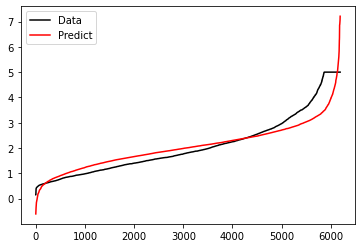

In [139]:
import matplotlib.pyplot as plt

plt.plot(range(len(ytest.values)),sorted(ytest.values),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()

### 利用岭回归

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [8]:
housevalue = fch()

In [9]:
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [143]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [144]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [146]:
xtrain,xtest,ytain,ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [149]:
#恢复索引
for i in [xtrain,xtest]:
    i.index = range(i.shape[0])

In [150]:
#岭回归建模
reg = Ridge(alpha=1).fit(xtrain,ytrain)
reg.score(xtest,ytest)#R2得分与之前的一样说明不是共线性的问题

0.6043610352312281

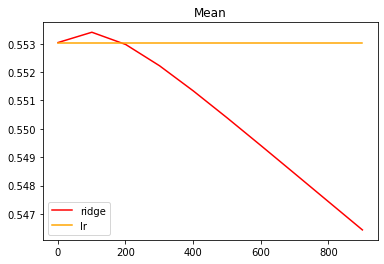

In [154]:
#交叉验证下的线性回归和岭回归
alpharange = np.arange(1,1001,100)
ridge=[]
lr=[]
for alpha in alpharange:
    #岭回归进行交叉验证
    reg = Ridge(alpha = alpha)
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').mean()
    #线性回归进行交叉验证
    l = LinearRegression()
    ls = cross_val_score(l,X,y,cv=5,scoring='r2').mean()
    
    ridge.append(regs)
    lr.append(ls)
    
plt.plot(alpharange,ridge,c='r',label='ridge')
plt.plot(alpharange,lr,c='orange',label='lr')
plt.legend()
plt.title('Mean')
plt.show()

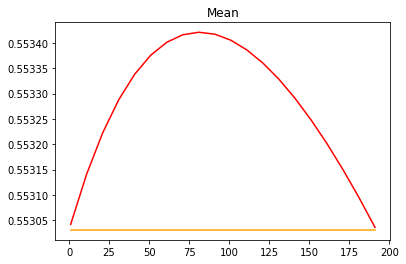

In [156]:
#根据上面的结果细化学习曲线
alpharange = np.arange(1,201,10)
ridge = []
lr= []
for alpha in alpharange:
    reg = Ridge(alpha = alpha)
    regs = cross_val_score(reg,X,y,cv=5,scoring='r2').mean()
    
    l = LinearRegression()
    ls = cross_val_score(l,X,y,cv=5,scoring='r2').mean()
    
    ridge.append(regs)
    lr.append(ls)

plt.plot(alpharange,ridge,c='r',label='ridge')
plt.plot(alpharange,lr,c='orange',label='linear')
plt.legend
plt.title('Mean')
plt.show()

In [158]:
#根据图给出alpha
reg = Ridge(alpha=80).fit(xtrain,ytrain)
reg.score(xtest,ytest)
#可以看到没有明显的效果提升，说明改变alpha并没有效果
#也就是模型效果不好并不是因为数据中带有共线性

0.6037290070912724

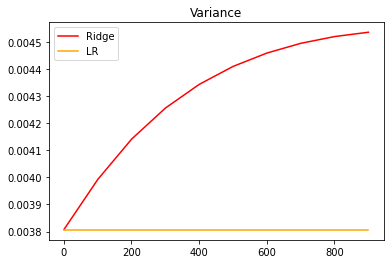

In [159]:
#模型方差如何变化？
alpharange = np.arange(1,1001,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,X,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,X,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

#### 换波士顿数据集进行线性回归和岭回归

In [160]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

x = load_boston().data
y = load_boston().target

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=420)

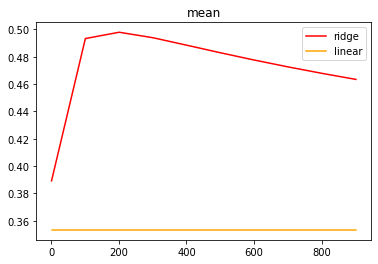

In [161]:
#boston 数据集R2的变化
alpharange = np.arange(1,1001,100)
ridge = []
lr=[]

for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    regs = cross_val_score(reg,x,y,cv=5,scoring='r2').mean()
    
    l = LinearRegression()
    ls = cross_val_score(l,x,y,cv=5,scoring='r2').mean()
    
    ridge.append(regs)
    lr.append(ls)
    
plt.plot(alpharange,ridge,c='r',label='ridge')
plt.plot(alpharange,lr,c='orange',label='linear')
plt.legend()
plt.title('mean')
plt.show()

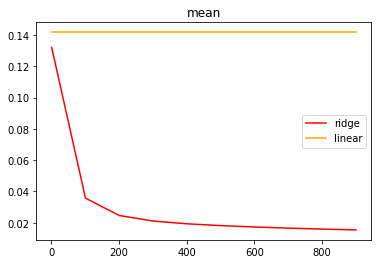

In [162]:
#boston 方差的变化
alpharange = np.arange(1,1001,100)
ridge = []
lr=[]

for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    regs = cross_val_score(reg,x,y,cv=5,scoring='r2').var()
    
    l = LinearRegression()
    ls = cross_val_score(l,x,y,cv=5,scoring='r2').var()
    
    ridge.append(regs)
    lr.append(ls)
    
plt.plot(alpharange,ridge,c='r',label='ridge')
plt.plot(alpharange,lr,c='orange',label='linear')
plt.legend()
plt.title('mean')
plt.show()

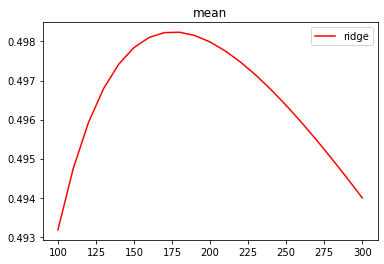

In [164]:
#细化学习曲线
alpharange = np.arange(100,301,10)
ridge = []
lr=[]

for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    regs = cross_val_score(reg,x,y,cv=5,scoring='r2').mean()
    
    l = LinearRegression()
    ls = cross_val_score(l,x,y,cv=5,scoring='r2').mean()
    
    ridge.append(regs)
    lr.append(ls)
    
plt.plot(alpharange,ridge,c='r',label='ridge')
#plt.plot(alpharange,lr,c='orange',label='linear')
plt.legend()
plt.title('mean')
plt.show()

#### 利用岭回归自带的交叉验证类

In [165]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [166]:
Ridge_ = RidgeCV(alphas=np.arange(1,1001,100)
                #,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                #,cv=5
               ).fit(X, y)

In [167]:
#无关交叉验证的岭回归结果
Ridge_.score(X,y)

0.6060251767338438

In [168]:
#调用所有交叉验证的结果
Ridge_.cv_values_.shape

(20640, 10)

In [169]:
#进行平均后可以查看每个正则化系数取值下的交叉验证结果
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [170]:
#查看被选择出来的最佳正则化系数
Ridge_.alpha_

101

### lasso的核心作用：特征选择

In [178]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [172]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [173]:
#恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [174]:
#线性回归进行拟合
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()

[43.73589305968414,
 1.0211268294494025,
 -10.780721617317724,
 62.64338275363785,
 5.216125353521561e-05,
 -0.33485096463337705,
 -41.30959378947711,
 -42.621095362084596]

In [175]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.73589305968408,
 1.0211268294494067,
 -10.780721617317734,
 62.643382753638136,
 5.216125353267284e-05,
 -0.33485096463335784,
 -41.309593789477134,
 -42.62109536208472]

In [176]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

<ipython-input-176-76c577e38589>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
/Users/sampson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/sampson/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3769.8607714139134, tolerance: 1.9172554769131482
  model = cd_fast.enet_coordinate_descent(


[43.73589305968404,
 1.0211268294494062,
 -10.78072161731767,
 62.64338275363778,
 5.21612535326548e-05,
 -0.33485096463335745,
 -41.30959378947717,
 -42.62109536208475]

其中出现报错的细节
1.正则项系数为0，这样的算法不可收敛，如果你想让正则化系数为0，请使用线性回归吧
2. 没有正则项的坐标下降法可能会导致意外的结果，不鼓励这样做！
3. 目标函数没有收敛，你也许想要增加迭代次数，使用一个非常小的alpha来拟合模型可能会造成精确度问题！

In [188]:
#在sklearn中不推荐0这个系数
#岭回归进行拟合
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.735757206215986,
 1.021129231812171,
 -10.780460336251718,
 62.64202320775727,
 5.217068073238264e-05,
 -0.3348506517067611,
 -41.30957143229181,
 -42.62105388932449]

In [189]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[14.581141247629423,
 0.6209347344423876,
 0.0,
 -0.0,
 -0.00028065986329010016,
 -0.0,
 -0.0,
 -0.0]

加大alpha的系数观察lasso和岭回归的区别

In [190]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=1000).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[39.71799309315608,
 1.190828260931059,
 -2.8479831478232303,
 19.598773615235547,
 0.0007136464417415501,
 -0.33447154643850513,
 -35.26619029329955,
 -35.634609043353834]

In [191]:
#Lasso进行拟合
lasso_ = Lasso(alpha=1000).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [192]:
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[14.581141247629423,
 0.6209347344423876,
 0.0,
 -0.0,
 -0.00028065986329010016,
 -0.0,
 -0.0,
 -0.0]

可以看到lasso对alpha系数是特别的敏感，可以产生稀疏矩阵并用于特征选择

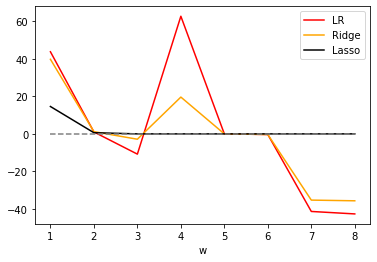

In [193]:
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

### 选取最佳的正则化参数取值

In [194]:
from sklearn.linear_model import LassoCV

In [195]:
#自己建立lasso进行alpha选择的范围
alpharange = np.logspace(-10,-2,200,base=10)

#其实是形成10为底的指数函数
#10**（-10）到10**（-2）

alpharange.shape

(200,)

In [196]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [197]:
lasso_ = LassoCV(alphas=alpharange,cv=5).fit(Xtrain,Ytrain)

In [198]:
#查看被选择出来的最佳正则化系统
lasso_.alpha_

0.0020729217795953697

In [199]:
#调用所有交叉验证的结果
lasso_.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [200]:
lasso_.mse_path_.shape #返回每个alpha下的五折交叉验证结果

(200, 5)

In [201]:
lasso_.mse_path_.mean(axis=1) #岭回归中的轴向是axis=0

#在岭回归当中，我们是留一验证，因此我们的交叉验证结果返回的是，每一个样本在每个alpha下的交叉验证结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=0，跨行求均值
#而在这里，我们返回的是，每一个alpha取值下，每一折交叉验证的结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=1，跨列求均值

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [202]:
#最佳正则化系数下获得的模型的系数结果
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [203]:
lasso_.score(Xtest,Ytest)

0.6038982670571437

与线性回归相比

In [204]:
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.6043668160178812

In [207]:
#使用lassoCV
ls = LassoCV(eps = 0.00001,n_alphas=300,cv=5).fit(Xtrain,Ytrain)

In [209]:
ls.alpha_

0.0020954551690628557

In [211]:
ls.alphas_ #查看所有自动生成的alpha取值

array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [212]:
ls.alphas_.shape

(300,)

In [213]:
ls.score(Xtest,Ytest)

0.60389154238192

In [214]:
ls.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])

### 多元线性回归

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

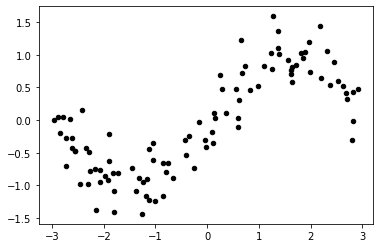

In [11]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数

#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数

#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

In [12]:
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape

(100,)

In [13]:
X = X.reshape(-1, 1)

In [14]:
X.shape

(100, 1)

#### 建模和拟合

In [15]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

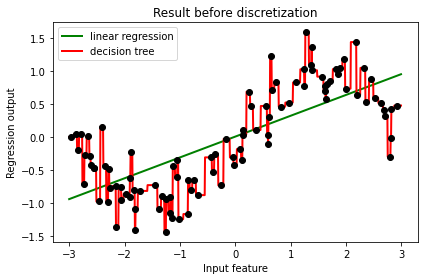

In [21]:
#放置画布
fig, ax1 = plt.subplots(1)

#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',label="decision tree")

#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')

#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()
#从这个图像来看，可以得出什么结果？


从图上可以看出两个模型对于非线性数据的拟合效果

### 多项式回归

In [23]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [24]:
#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [25]:
#二次多项式
poly = PolynomialFeatures(degree=2)

In [26]:
#接口transform直接调用
X_ =poly.fit_transform(X)
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [27]:
X_.shape

(3, 3)

In [28]:
#三次多项式
PolynomialFeatures(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [29]:
#三次多项式，不带与截距项相乘的x0
PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [31]:
#为什么我们会希望不生成与截距相乘的x0呢？
#对于多项式回归来说，我们已经为线性回归准备好了x0，但是线性回归并不知道
xxx = PolynomialFeatures(degree=3).fit_transform(X)
xxx

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [234]:
xxx.shape

(3, 4)

In [236]:
rnd = np.random.RandomState(42)
y = rnd.randn(3)
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [237]:
#生成了多少个系数
LinearRegression().fit(xxx,y).coef_

array([ 3.10862447e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [238]:
#查看截距
LinearRegression().fit(xxx,y).intercept_


1.2351711202036884

In [240]:
#发现问题了吗？线性回归并没有把多项式生成的x0当作是截距项
#所以我们可以选择：关闭多项式回归中的include_bias
#也可以选择：关闭线性回归中的fit_intercept
#生成了多少个系数？
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [242]:
#查看截距
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

### 多项式处理非线性问题

In [244]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np

In [245]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3,3,size=100)
y = np.sin(X)+rnd.normal(size=len(X))/3

In [247]:
X = X.reshape(-1,1)

In [248]:
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3,3,1000,endpoint = False).reshape(-1,1)

In [249]:
#原始特征矩阵的拟合结果
linear = LinearRegression().fit(X,y)
#训练数据的拟合
linear.score(X,y) 

0.5361526059318595

In [250]:
#测试数据的拟合
linear.score(line,np.sin(line))

0.6800102369793312

In [253]:
#多项式拟合

d=5
#进行高次项的转换
poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_=poly.transform(line)

#训练数据拟合
linear_ = LinearRegression().fit(X_,y)
linear_.score(X_,y)

0.8561679370344799

In [254]:
#测试数据的拟合
linear_.score(line_,np.sin(line))

0.9868904451787954

#### 可视化

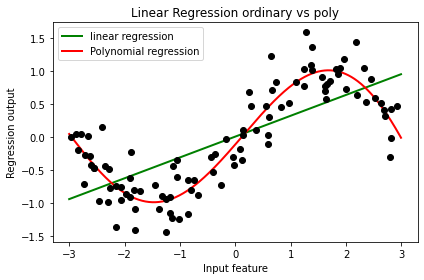

In [255]:
import matplotlib.pyplot as plt
d=5 
#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line) 

#放置画布
fig, ax1 = plt.subplots(1) 
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red',label="Polynomial regression") 
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k') 
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

### 多项式回归的可解释性

In [257]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [258]:
poly = PolynomialFeatures(degree=5).fit(X)

In [259]:
#重要接口get_feature_names
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

#### 使用加利福尼亚作为例子

In [260]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd

In [261]:
housevalue = fch()

In [262]:
X = pd.DataFrame(housevalue.data)
y=housevalue.target

In [263]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [265]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目","平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [267]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [266]:
poly = PolynomialFeatures(degree=2).fit(X,y)
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [268]:
X_ = poly.transform(X)

In [269]:
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)
coef = reg.coef_

In [270]:
coef

array([ 5.91953777e-08, -1.12430255e+01, -8.48898554e-01,  6.44105917e+00,
       -3.15913295e+01,  4.06090715e-04,  1.00386233e+00,  8.70568192e+00,
        5.88063276e+00, -3.13081229e-02,  1.85994748e-03,  4.33020426e-02,
       -1.86142286e-01,  5.72831322e-05, -2.59019481e-03, -1.52505717e-01,
       -1.44242943e-01,  2.11725318e-04, -1.26219003e-03,  1.06115053e-02,
        2.81885180e-06, -1.81716945e-03, -1.00690372e-02, -9.99950178e-03,
        7.26947764e-03, -6.89064364e-02, -6.82365634e-05,  2.68878839e-02,
        8.75089917e-02,  8.22890370e-02,  1.60180951e-01,  5.14263964e-04,
       -8.71911401e-02, -4.37043021e-01, -4.04150596e-01,  2.73779222e-09,
        1.91426760e-05,  2.29529841e-05,  1.46567752e-05,  8.71560998e-05,
        2.13344592e-02,  1.62412938e-02,  6.18867358e-02,  1.08107173e-01,
        3.99077350e-02])

In [271]:
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

[('1', 5.9195377741683634e-08),
 ('住户收入中位数', -11.24302546337775),
 ('房屋使用年代中位数', -0.8488985544320382),
 ('平均房间数目', 6.441059166971497),
 ('平均卧室数目', -31.591329547028543),
 ('街区人口', 0.0004060907146408955),
 ('平均入住率', 1.0038623305459058),
 ('街区的纬度', 8.705681922361359),
 ('街区的经度', 5.880632755123578),
 ('住户收入中位数^2', -0.03130812293791488),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599474777355296),
 ('住户收入中位数 平均房间数目', 0.043302042617317855),
 ('住户收入中位数 平均卧室数目', -0.18614228591103826),
 ('住户收入中位数 街区人口', 5.7283132246984184e-05),
 ('住户收入中位数 平均入住率', -0.002590194814390935),
 ('住户收入中位数 街区的纬度', -0.15250571732259724),
 ('住户收入中位数 街区的经度', -0.14424294301737),
 ('房屋使用年代中位数^2', 0.0002117253182642182),
 ('房屋使用年代中位数 平均房间数目', -0.0012621900269522755),
 ('房屋使用年代中位数 平均卧室数目', 0.010611505324736788),
 ('房屋使用年代中位数 街区人口', 2.8188518019084396e-06),
 ('房屋使用年代中位数 平均入住率', -0.0018171694520991552),
 ('房屋使用年代中位数 街区的纬度', -0.01006903724531395),
 ('房屋使用年代中位数 街区的经度', -0.009999501779382889),
 ('平均房间数目^2', 0.0072694776391479575),
 ('平均房间数目 平均卧室

In [272]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T

In [273]:
coeff.columns = ["feature","coef"]
coeff.sort_values(by="coef")

,feature,coef
4,平均卧室数目,-31.59133
1,住户收入中位数,-11.243025
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.087191
25,平均房间数目 平均卧室数目,-0.068906


In [274]:
#顺便可以查看一下多项式变化之后，模型的拟合效果如何了
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)

In [275]:
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.606232685199805

In [276]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))

R2:0.7445104194582777
time:0.5005500316619873


In [277]:
#假设使用其他模型？
#使用非线性的模型
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.9741335896898138
time:9.773661375045776
